In [14]:
import pandas
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [15]:
data = pandas.read_csv('archivos/fifa_datos.csv')

In [16]:
# Remove NaN values form Weight column
print('Has NaN values: ', data['Weight'].hasnans)
data = data[data['Weight'].notna()]
print('Has NaN values: ', data['Weight'].hasnans)

Has NaN values:  True
Has NaN values:  False


In [17]:
# Remove 'lbs' from Weight column and transform to int type
data['Weight'] = data['Weight'].apply(lambda x: int(str(x).replace('lbs', '')))
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [18]:
def get_weight(dataframe, column, lower_bound: int, upper_bound: int):
     return dataframe[ (dataframe[column] >= lower_bound) & (dataframe[column] < upper_bound) ].shape[0]

below_125 = get_weight(data, 'Weight', 0, 125)
from_125_to_150 = get_weight(data, 'Weight', 125, 150)
from_150_to_175 = get_weight(data, 'Weight', 150, 175)
from_175_to_max = get_weight(data, 'Weight', 175, max(data['Weight']))

weights_dict = {'Debajo de 125 lbs': below_125,
                'Entre 125 y 150 lbs': from_125_to_150,
                'Entre 150 y 175 lbs': from_150_to_175,
                'Desde 175 o superior: ': from_175_to_max}

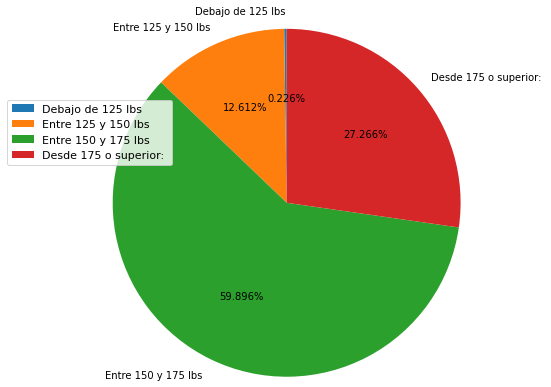

In [19]:
plt.pie(weights_dict.values(), labels=weights_dict.keys(), autopct='%1.3f%%', radius=2, startangle=90)
plt.legend(loc='best', prop={'size': 11}, bbox_to_anchor=(0.0, 1),)
plt.show()

In [20]:
weights_dataframe = pd.DataFrame.from_dict(weights_dict.items())
weights_dataframe.columns = ['Peso', 'Cantidad']
fig = px.pie(weights_dataframe, values='Cantidad', names='Peso')
fig.show()

# Histograma de acuerdo a la habilidad (Overall) en base a segmentos contando el numero de jugadores:

## 40 - 50 - 60 - 70 - 80 - 90

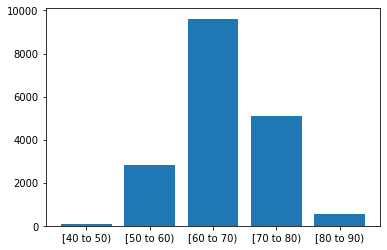

In [21]:
from_40_to_50 = len([x for x in data['Overall'] if 40 <= x < 50])
from_50_to_60 = len([x for x in data['Overall'] if 50 <= x < 60])
from_60_to_70 = len([x for x in data['Overall'] if 60 <= x < 70])
from_70_to_80 = len([x for x in data['Overall'] if 70 <= x < 80])
from_80_to_90 = len([x for x in data['Overall'] if 80 <= x < 90])

histogram_labels = ['[40 to 50)', '[50 to 60)', '[60 to 70)', '[70 to 80)', '[80 to 90)']
histogram_values = [from_40_to_50, from_50_to_60, from_60_to_70, from_70_to_80, from_80_to_90]

plt.bar(histogram_labels, histogram_values)
plt.show()

In [27]:
histogram_dataframe = pd.DataFrame.from_dict(dict(zip(histogram_labels, histogram_values)).items())
histogram_dataframe.columns = ['labels', 'values']
fig = px.bar(histogram_dataframe, x='labels', y='values')
fig.show()